In [2]:
import os
os.chdir('d:/ALL/Object_Tracking')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation 
from tracker import ColorTracker, NumpyColorTracker, SIFTTracker, ScaleSpaceTracker
from scratch.meanshift import meanshift
from scratch.camshift import camshift
from dataset import VOT14Reader
import cv2


In [3]:
from functools import partial

dataset = VOT14Reader(dataset_path="./vot14")

sample = dataset[0] # 13 for ball
polygon = sample[1][0]
frame = sample[0][0]

# tracker = partial(cv2.CamShift, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1))
tracker = meanshift
# tracker = partial(cv2.meanShift, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1))

# color_tracker = ColorTracker(image=frame, roi_window=polygon, tracker=tracker)
# color_tracker = ScaleSpaceTracker(image=frame, roi_window=polygon, tracker=tracker, scale_range=[-2, 3])
color_tracker = SIFTTracker(image=frame, roi_window=polygon, tracker=tracker)




d:\ALL\Object_Tracking\tracker\sift_tracker.py:23: RuntimeWarning: divide by zero encountered in divide
  R = M / I
d:\ALL\Object_Tracking\tracker\sift_tracker.py:23: RuntimeWarning: invalid value encountered in divide
  R = M / I


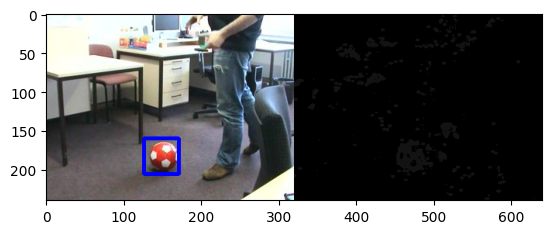

In [4]:
fig, ax = plt.subplots()
images = []
for frame in sample[0][1:]:
    color_tracker.track(frame)
    polygon = color_tracker.get_current_window()
    x, y, w, h = polygon
    image = cv2.rectangle(frame, (x, y), (x+w, y+h), 255, 3)

    # final_image = np.concatenate([image, color_tracker.probability_map])
    final_image = np.concatenate([cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                                  cv2.cvtColor((255 * color_tracker.probability_map/color_tracker.probability_map.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR)], axis=1)
    images.append([ax.imshow(final_image, animated=True)])

In [5]:
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)
from IPython.display import HTML
HTML(ani.to_html5_video())